## **Credit Card Fraud Detection**

https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

### **Dataset**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import os

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
files = os.listdir(path)

print("Files in the dataset:", files)
print("Path to dataset files:", path)

Files in the dataset: ['creditcard.csv']
Path to dataset files: /Users/alexander/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [3]:
file = os.path.join(path, "creditcard.csv")

df = pd.read_csv(file)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **EDA**

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum().max()

0

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
no_fraud = df.Class.value_counts(normalize=True)[0]
fraud = df.Class.value_counts(normalize=True)[1]

print(f"No fraud occurred in {(no_fraud*100):.2f}% of transactions")
print(f"Fraud occurred in {(fraud*100):.2f}% of transactions")
print()
print("The dataset is very imbalanced")

No fraud occurred in 99.83% of transactions
Fraud occurred in 0.17% of transactions

The dataset is very imbalanced


If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud.  

But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

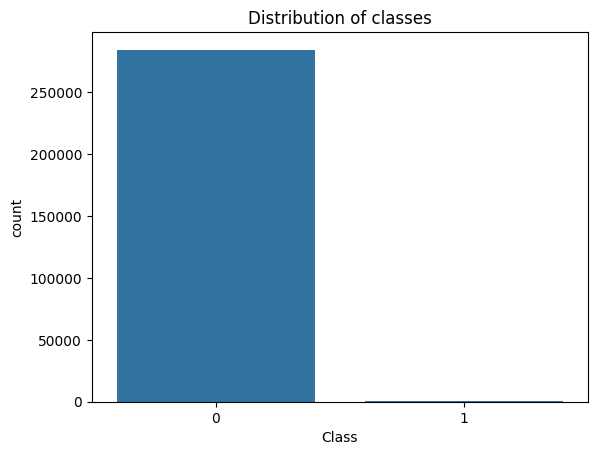

In [9]:
sns.countplot(x='Class', data=df)  # Specify x as a keyword argument
plt.title("Distribution of classes")
plt.show()

(0.0, 172792.0)

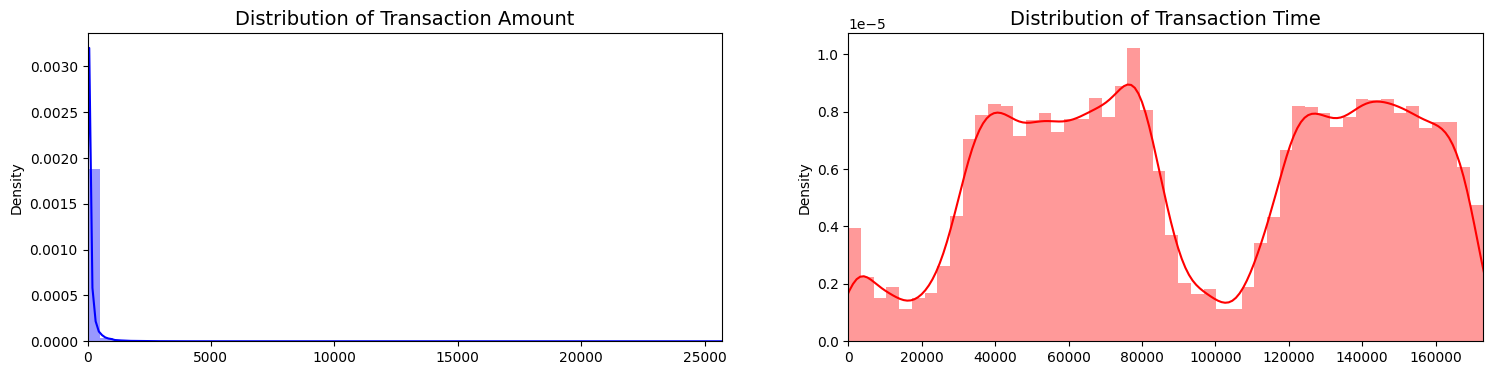

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])


sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


In [11]:
# Average of all transactions
average_tx = np.mean(df.Amount)
print(f"The average of all transactions is ${average_tx:.2f}")

The average of all transactions is $88.35


In [12]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], inplace=True, axis=1)

In [13]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop("Class", axis=1)
y = df.Class

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False) # ensures that each fold has a representative distribution of the target classes

for train_index, test_index in sss.split(X,y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index],X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index],y.iloc[test_index]

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### **Random Undersampling**

Consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.  

Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.  

After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes.  

Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

In [15]:
df = df.sample(frac=1)
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
68191,12.701879,-0.373818,-0.458660,-3.867561,0.021802,0.219898,-2.379042,0.485191,-0.061524,0.027499,...,1.891087,0.580444,-0.320339,-0.848839,0.051084,0.030355,-0.336226,-0.129794,0.170227,0
254867,1.997764,0.848906,1.711470,-0.802182,-0.932804,0.158395,-0.213579,0.139157,-0.239190,0.025006,...,0.154381,-0.127630,-0.576361,0.090308,-1.080038,-0.297604,-0.955850,0.023390,-0.019585,0
195939,-0.307413,0.547422,1.967256,0.727108,-1.087221,3.851212,0.675885,-0.576084,0.636685,-0.299253,...,-0.331051,-0.023855,0.043501,0.102387,0.026050,0.222577,0.018297,-0.060855,-0.061035,0
138842,-0.010620,-0.021347,-0.578880,1.345268,0.355474,0.180242,-0.243528,-1.378049,0.755985,-0.001466,...,-0.222459,0.223416,0.482098,-0.044140,0.768734,-0.108140,0.321881,-0.391727,-0.039785,0
88213,0.191295,-0.266086,1.214401,-0.708763,-0.484615,-0.906243,1.299708,3.882048,-1.197890,1.047207,...,0.100647,-0.270845,-0.732854,0.020844,1.078721,0.285264,0.954954,-0.036583,0.012265,0


In [16]:
df[df['Class'] == 1].shape

(492, 31)

In [17]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1) # shuffle 100% of the rows

# amount of fraud classes 492 rows.
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

print(f"New DataFrame has {new_df.shape[0]} rows and {new_df.shape[1]} columns.")
print(f"New DataFrame has {fraud_df.shape[0]} fraud samples and {non_fraud_df.shape[0]} non-fraud samples.")
print("-"*100)
new_df.head()

New DataFrame has 984 rows and 31 columns.
New DataFrame has 492 fraud samples and 492 non-fraud samples.
----------------------------------------------------------------------------------------------------


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
240991,-0.239223,0.777065,-0.379738,1.148539,0.163541,0.835192,1.079966,-0.610168,1.366902,-0.397270,...,0.005429,0.131102,0.747371,-0.362139,0.018298,-0.101418,-0.447919,0.016607,0.003981,0
122479,2.763921,-0.095361,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,...,-0.156289,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,1
54522,0.089150,-0.448807,1.190011,-0.028040,0.500618,0.863572,-0.623998,-0.716772,-0.030341,-0.110176,...,-0.111355,-0.225344,-0.542027,0.000903,0.416128,0.427502,0.268292,-0.030040,0.015542,0
93424,-0.293440,-0.238255,-1.348042,2.522821,-0.782432,4.083047,-0.662280,-0.598776,-1.943552,-0.329579,...,0.348896,1.079871,-0.352026,-0.218358,0.125866,-0.074180,0.179116,0.612580,0.234206,1
238222,-0.292042,0.762344,-4.280584,1.421100,-3.908229,2.942946,-0.076205,-2.002526,-2.874155,-0.856005,...,-0.198963,-0.140062,-0.907720,-0.680108,-0.349170,0.056276,-1.149923,-1.809886,0.723051,1


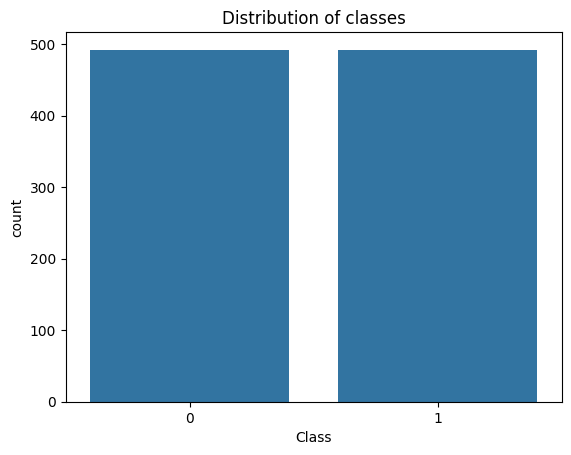

In [18]:
sns.countplot(x="Class", data=new_df)
plt.title("Distribution of classes")
plt.show()

### **Correlation Matrices**

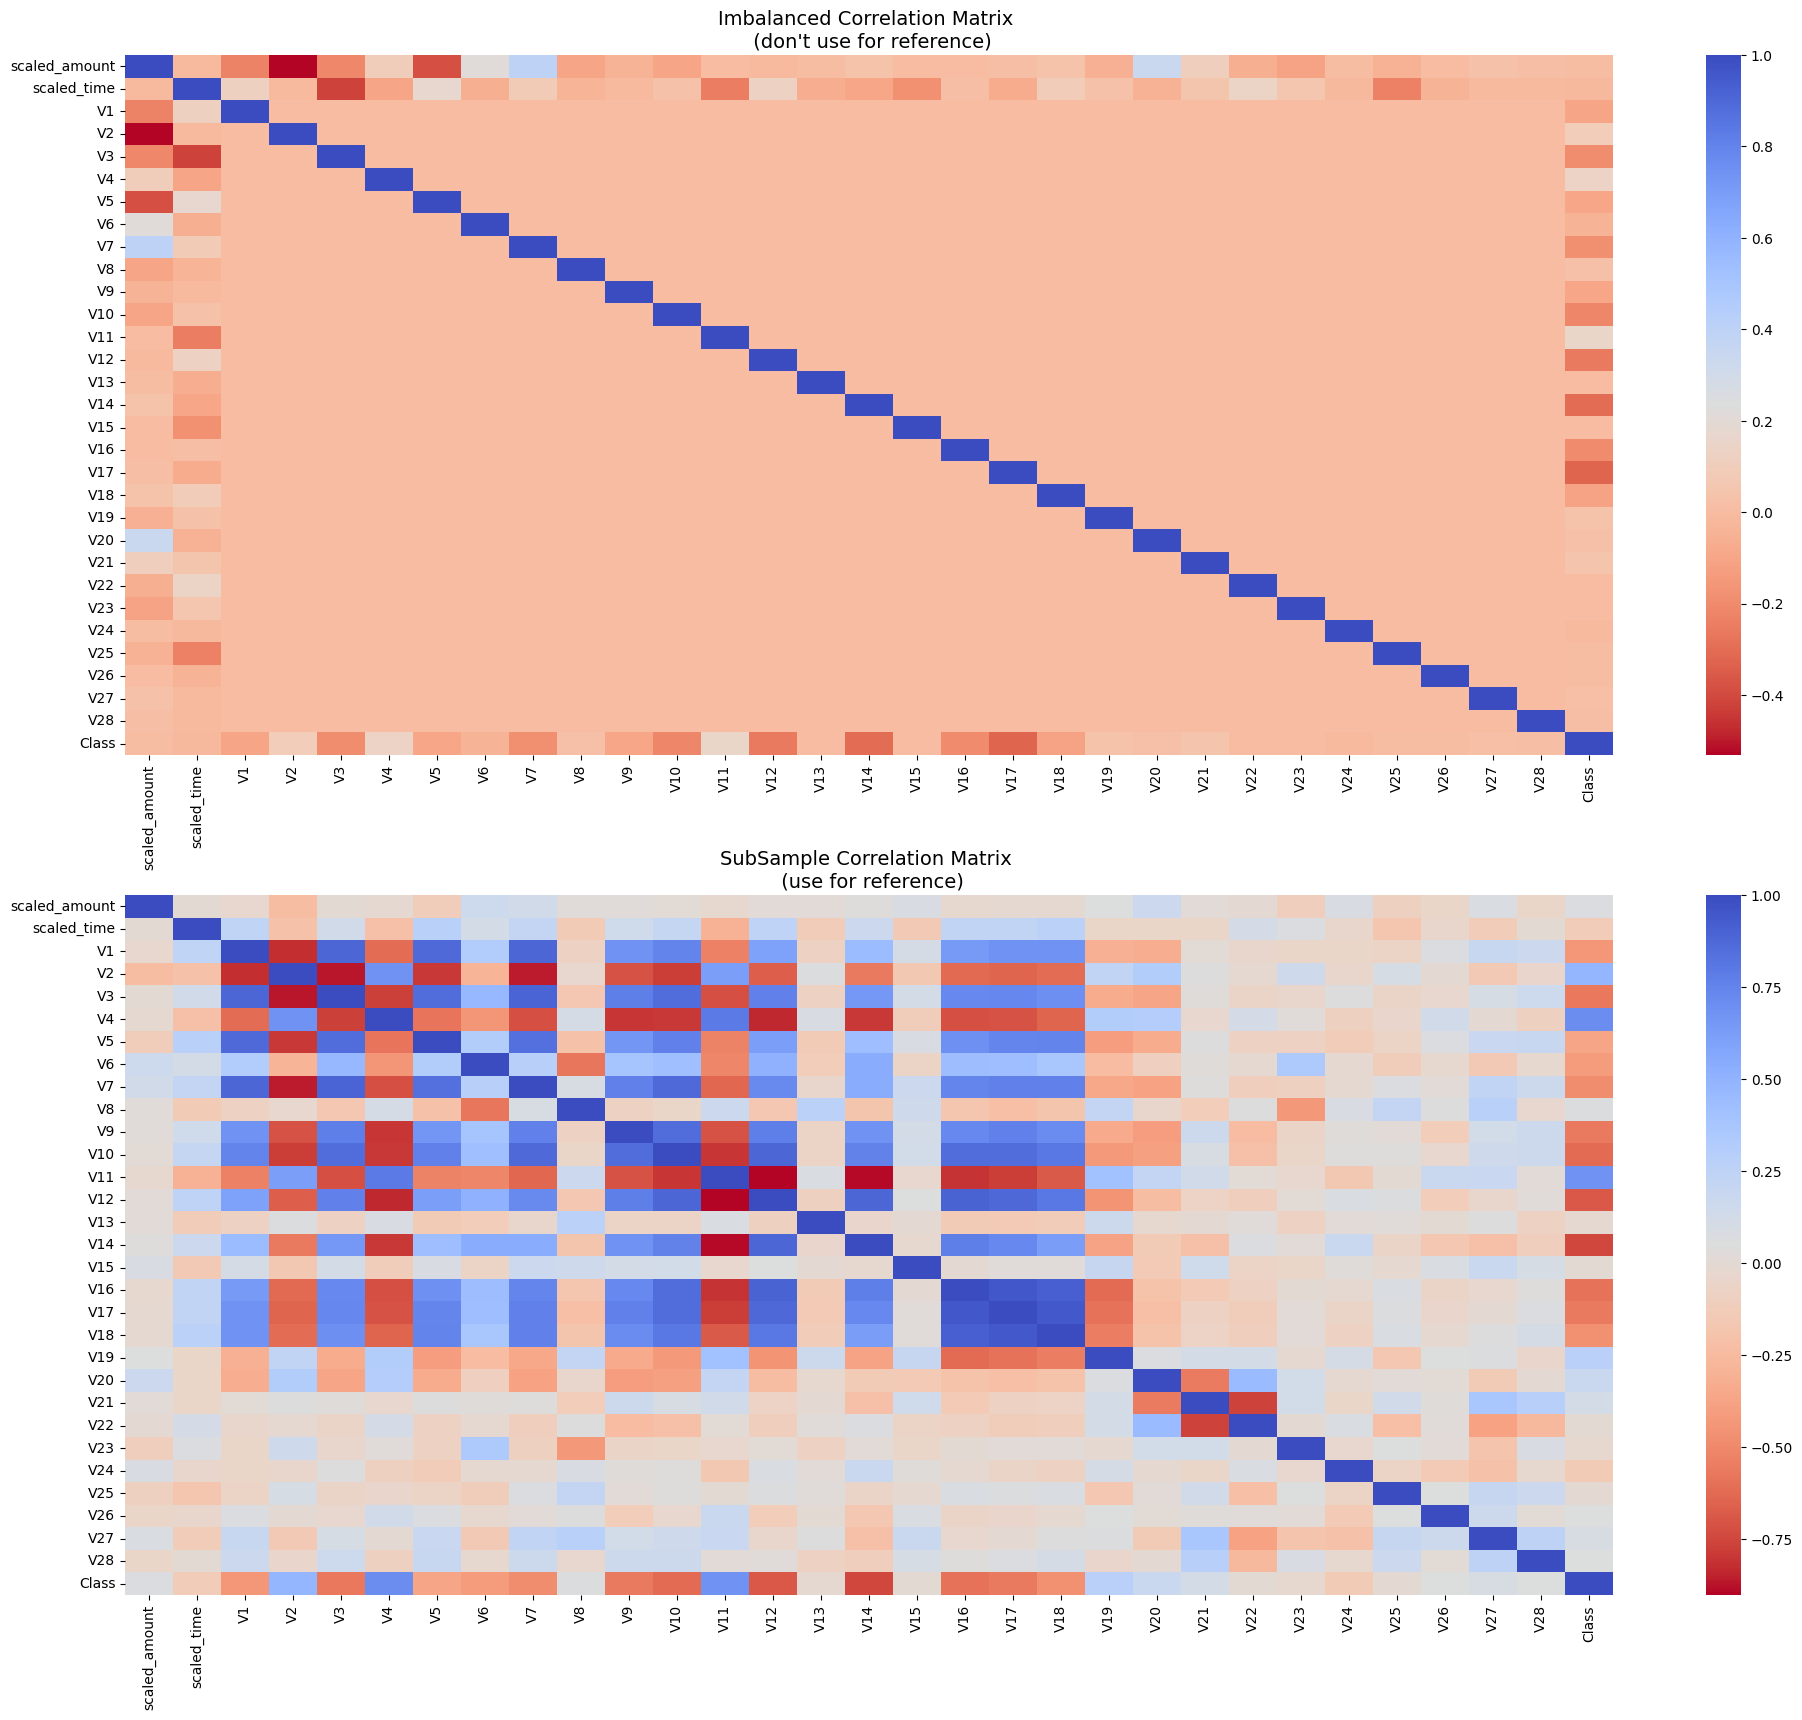

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()

sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax[0])
ax[0].set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax[1])
ax[1].set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

plt.show()

In [20]:
# Feature correlation

top_5_negative_corr = sub_sample_corr.Class.sort_values(ascending=True)[:5]
top_5_positive_corr = sub_sample_corr.Class.sort_values(ascending=False)[:5]

print("-"*100)
print(f"Top 5 negatively correlated features:\n", top_5_negative_corr)
print("-"*100)
print(f"Top 5 positively correlated features:\n", top_5_positive_corr)

----------------------------------------------------------------------------------------------------
Top 5 negatively correlated features:
 V14   -0.751194
V12   -0.690645
V10   -0.622985
V16   -0.589515
V3    -0.568576
Name: Class, dtype: float64
----------------------------------------------------------------------------------------------------
Top 5 positively correlated features:
 Class    1.000000
V4       0.704365
V11      0.681839
V2       0.484932
V19      0.279312
Name: Class, dtype: float64


Negative correlation: The lower these values are, the more likely the end result will be a fraud transaction.
----------------------------------------------------------------------------------------------------
Positive correlation: The higher these values are, the more likely the end result will be a fraud transaction.
----------------------------------------------------------------------------------------------------


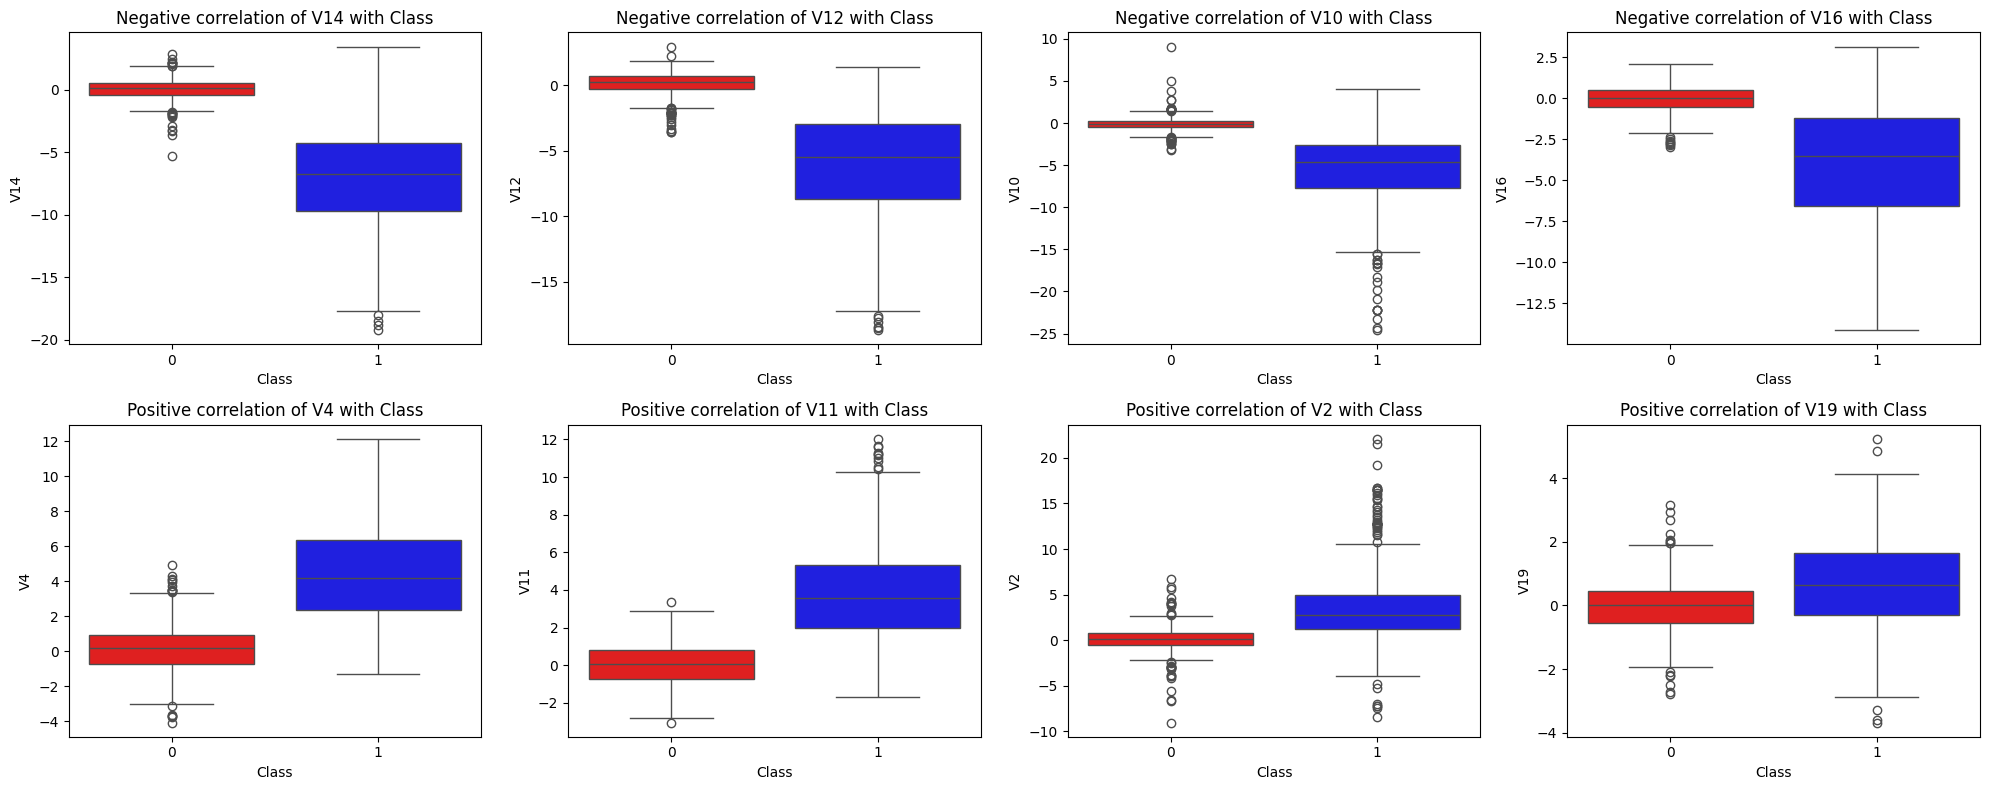

In [21]:
# Negative correlations

fig, ax = plt.subplots(2,4, figsize=(20,8))

negative_corr_cols = ["V14", "V12", "V10", "V16"]
positive_corr_cols = ["V4", "V11", "V2", "V19"]
pos_neg_cols = negative_corr_cols + positive_corr_cols

print("Negative correlation: The lower these values are, the more likely the end result will be a fraud transaction.")
print("-"*100)
print("Positive correlation: The higher these values are, the more likely the end result will be a fraud transaction.")
print("-"*100)
for i, col in enumerate(pos_neg_cols):
    sns.boxplot(x="Class", y=col, data=new_df, palette=["r", "b"], ax=ax[i//4,i%4])
    if(col in negative_corr_cols):
        ax[i//4,i%4].set_title(f"Negative correlation of {col} with Class")
    else:
        ax[i//4,i%4].set_title(f"Positive correlation of {col} with Class")

plt.tight_layout()
plt.show()
    

### **Anomaly Detection**

Remove "extreme outliers" from features that have a high correlation with our classes.  

This will have a positive impact on the accuracy of our models.

In [22]:
new_df['Class'] == 1

240991    False
122479     True
54522     False
93424      True
238222     True
          ...  
143336     True
106998     True
204327    False
154454     True
61787      True
Name: Class, Length: 984, dtype: bool

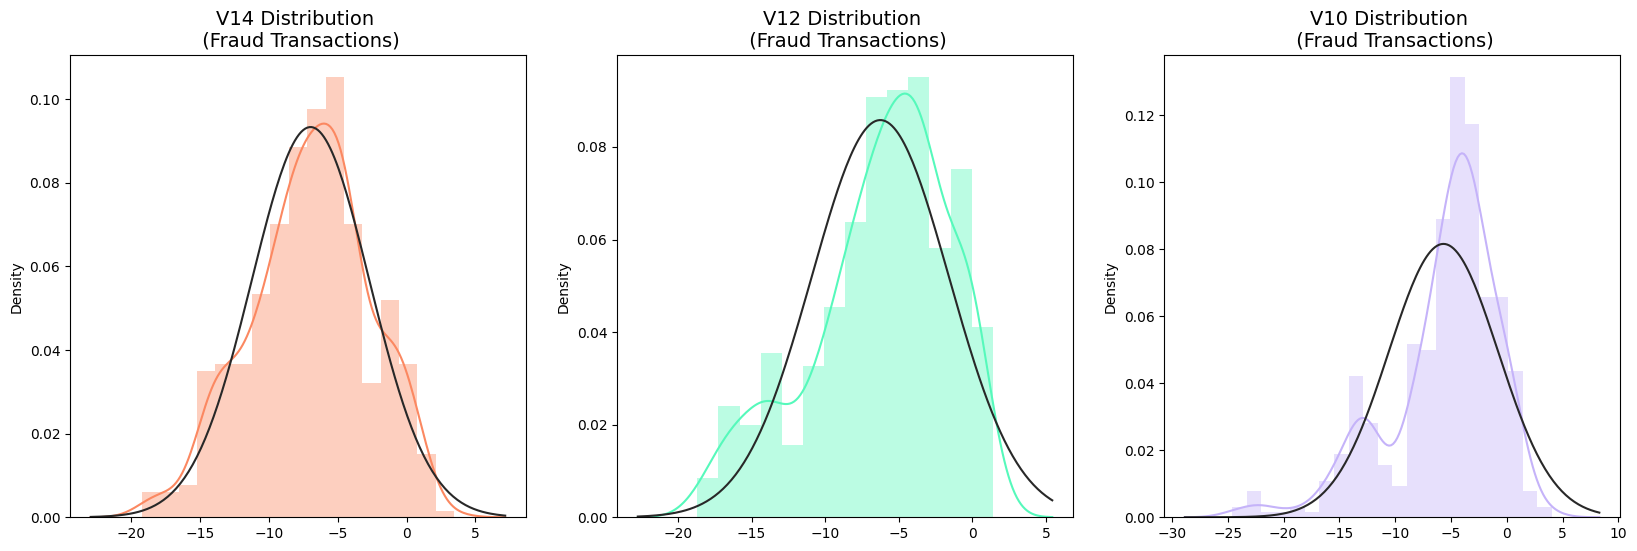

In [23]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values # select only those rows where the Class column is equal to 1
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

### **Removing Outliers**

We have to be careful as to how far do we want the threshold for removing outliers.  

We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range).  

The Tradeoff: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy.  

In [24]:
# -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print(f'V14 Lower: {v14_lower}')
print(f'V14 Upper: {v14_upper}')
outliers_14 = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print(f'V14 outliers:{outliers_14}')
print(f'Feature V14 Outliers for Fraud Cases: {len(outliers_14)}')
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index) # .index is used to get the index of the rows that meet the outlier conditions, allowing you to drop those specific rows from the DataFrame.
print(f'Number of Instances after outliers removal: {len(new_df)}')
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print(f'V12 Lower: {v12_lower}')
print(f'V12 Upper: {v12_upper}')
outliers_12 = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print(f'V12 outliers: {outliers_12}')
print(f'Feature V12 Outliers for Fraud Cases: {len(outliers_12)}')
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print(f'Number of Instances after outliers removal: {len(new_df)}')
print('----' * 44)

# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print(f'V10 Lower: {v10_lower}')
print(f'V10 Upper: {v10_upper}')
outliers_10 = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print(f'V10 outliers: {outliers_10}')
print(f'Feature V10 Outliers for Fraud Cases: {len(outliers_10)}')
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print(f'Number of Instances after outliers removal: {len(new_df)}')

V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
V14 outliers:[-18.8220867423816, -19.2143254902614, -18.4937733551053, -18.0499976898594]
Feature V14 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 980
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.0475965708216, -18.4311310279993, -18.6837146333443]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.2318333653018, -16.2556117491401, -16.3035376590131, -15.5637913387301, -24.4031849699728, -1

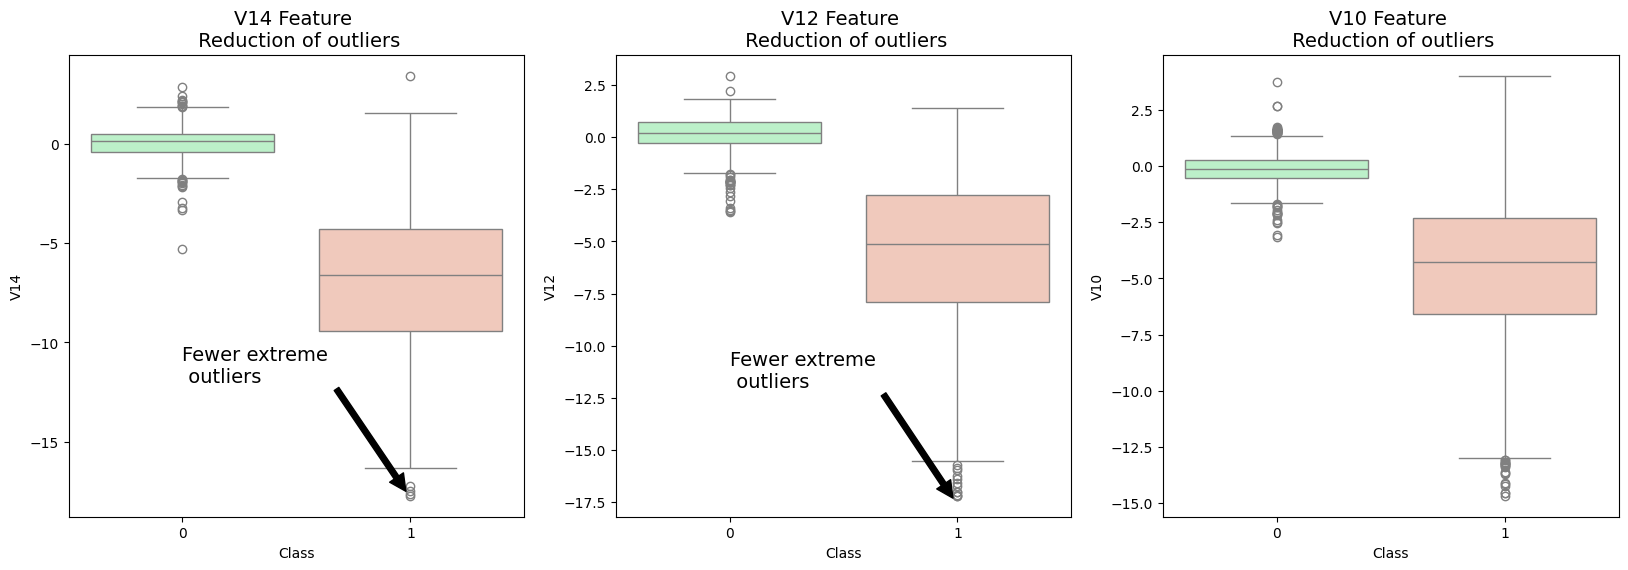

In [25]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

### **Dimensionality Reduction**

In [26]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print(f"T-SNE took {t1 - t0:.2} s")

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print(f"PCA took {t1 - t0:.2} s")

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print(f"Truncated SVD took {t1 - t0:.2} s")

T-SNE took 2.7 s
PCA took 0.002 s
Truncated SVD took 0.0031 s


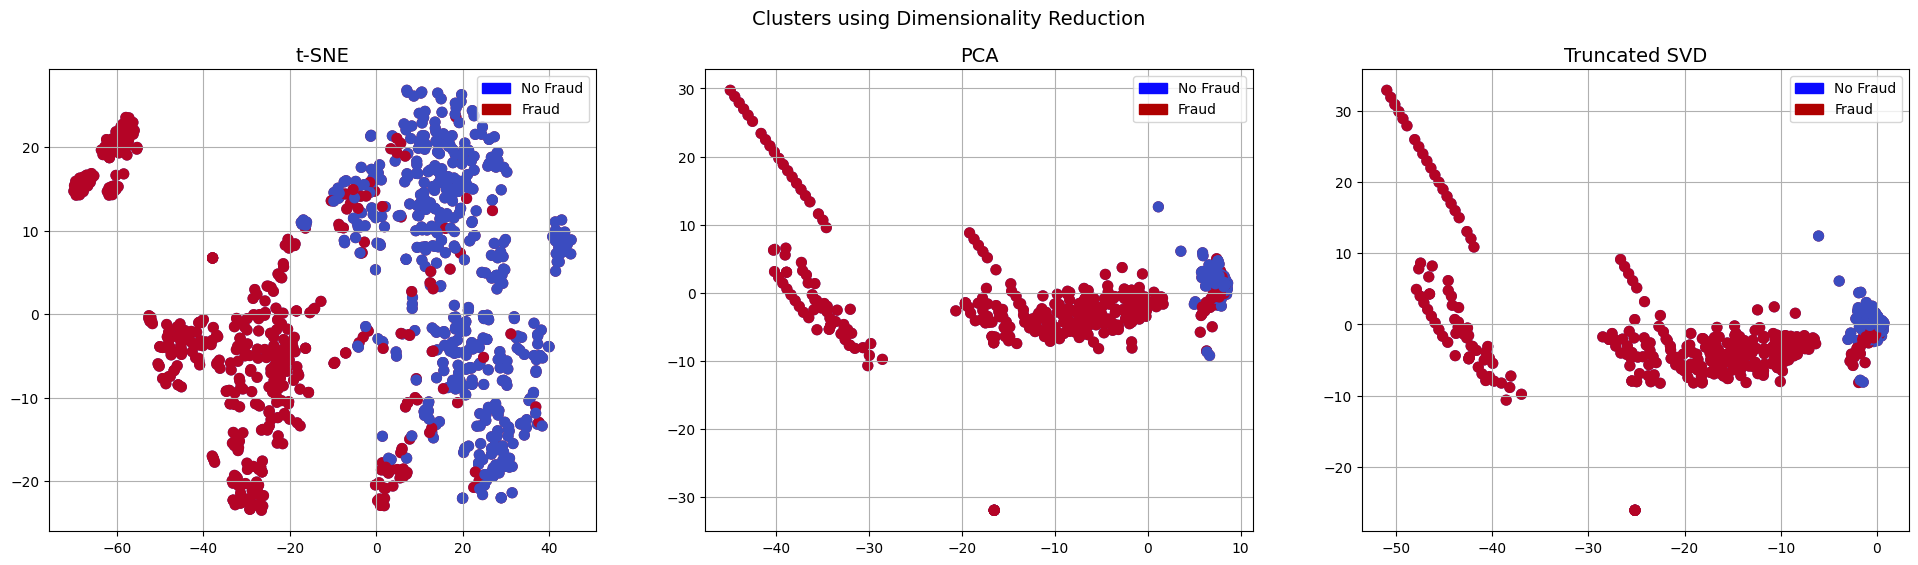

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## **Classifiers (Undersampling)**

In [28]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop("Class", axis=1)
y = new_df["Class"]

In [29]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [31]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [32]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


GridSearchCV uses cross-validation to find the best hyperparameters while ensuring the model generalizes well.  

1. Grid Search: It tests different combinations of hyperparameters for your model (e.g., learning rate, tree depth) by systematically searching through a “grid” of possible values.  
2.	Cross-Validation: For each combination of hyperparameters, it performs cross-validation (splitting the data into training and validation sets multiple times) to evaluate the model’s performance on unseen data.  
3.	Best Hyperparameters: After testing all combinations, it selects the hyperparameter set that gives the best average performance across the cross-validation folds.  

In [33]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "solver": ['liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# KNN  
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [34]:
print("-"*45)
print(f"Best params {grid_log_reg.best_params_}")
print("-"*45)
print(f"Best estimator {grid_log_reg.best_estimator_}")
print("-"*45)
print(f"Best score {grid_log_reg.best_score_}")
print("-"*45)

---------------------------------------------
Best params {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
---------------------------------------------
Best estimator LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
---------------------------------------------
Best score 0.9405629139072846
---------------------------------------------


In [35]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.06%
Knears Neighbors Cross Validation Score 93.4%
Support Vector Classifier Cross Validation Score 93.66%
DecisionTree Classifier Cross Validation Score 93.53%


In [36]:
# We will undersample during cross validating

ple_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))


NameError: name 'undersample_X' is not defined

In [37]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1243: Convergenc

<module 'matplotlib.pyplot' from '/opt/miniconda3/envs/ml/lib/python3.11/site-packages/matplotlib/pyplot.py'>

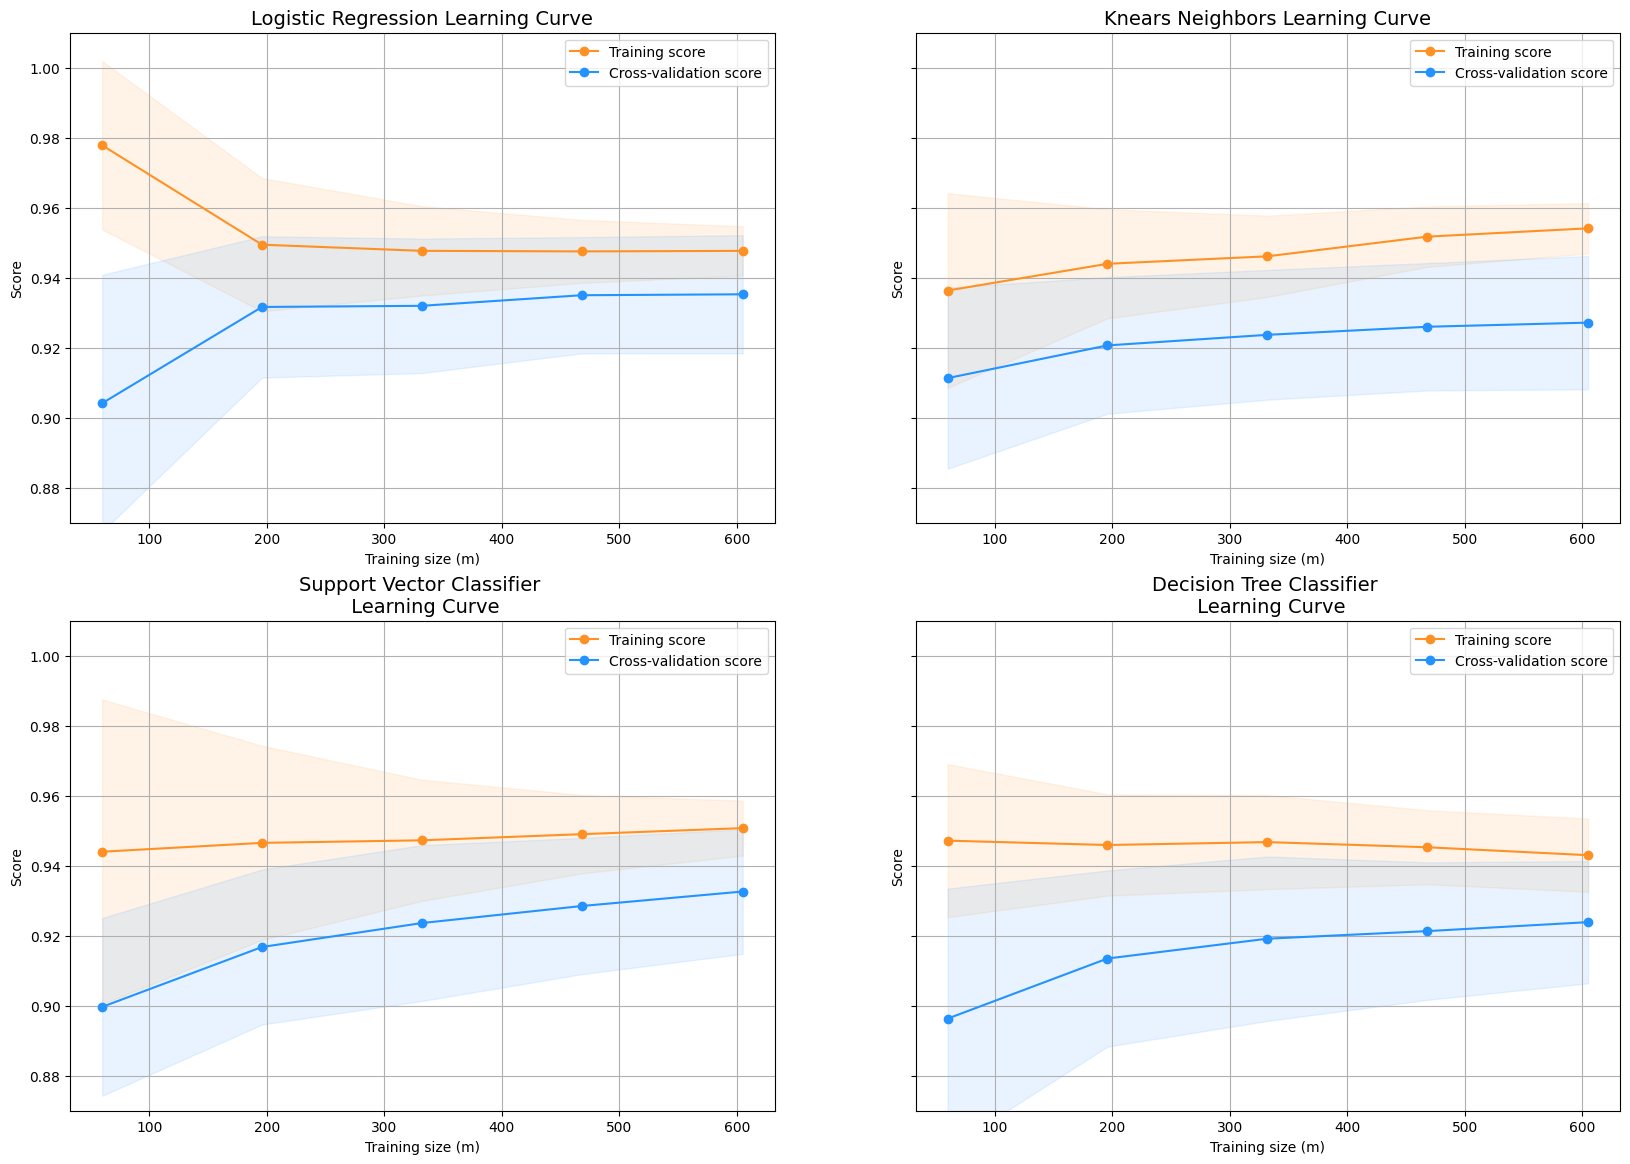

In [38]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(grid_log_reg, grid_knears, grid_svc, grid_tree, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [39]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

log_reg_pred = cross_val_predict(grid_log_reg, X_train, y_train, cv=5, method="decision_function")
knears_pred = cross_val_predict(grid_knears, X_train, y_train, cv=5)
svc_pred = cross_val_predict(grid_svc, X_train, y_train, cv=5, method="decision_function")
tree_pred = cross_val_predict(grid_tree, X_train, y_train, cv=5)

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9719451371571073
KNears Neighbors:  0.9257334192608366
Support Vector Classifier:  0.9748521953543108
Decision Tree Classifier:  0.9207458880887667


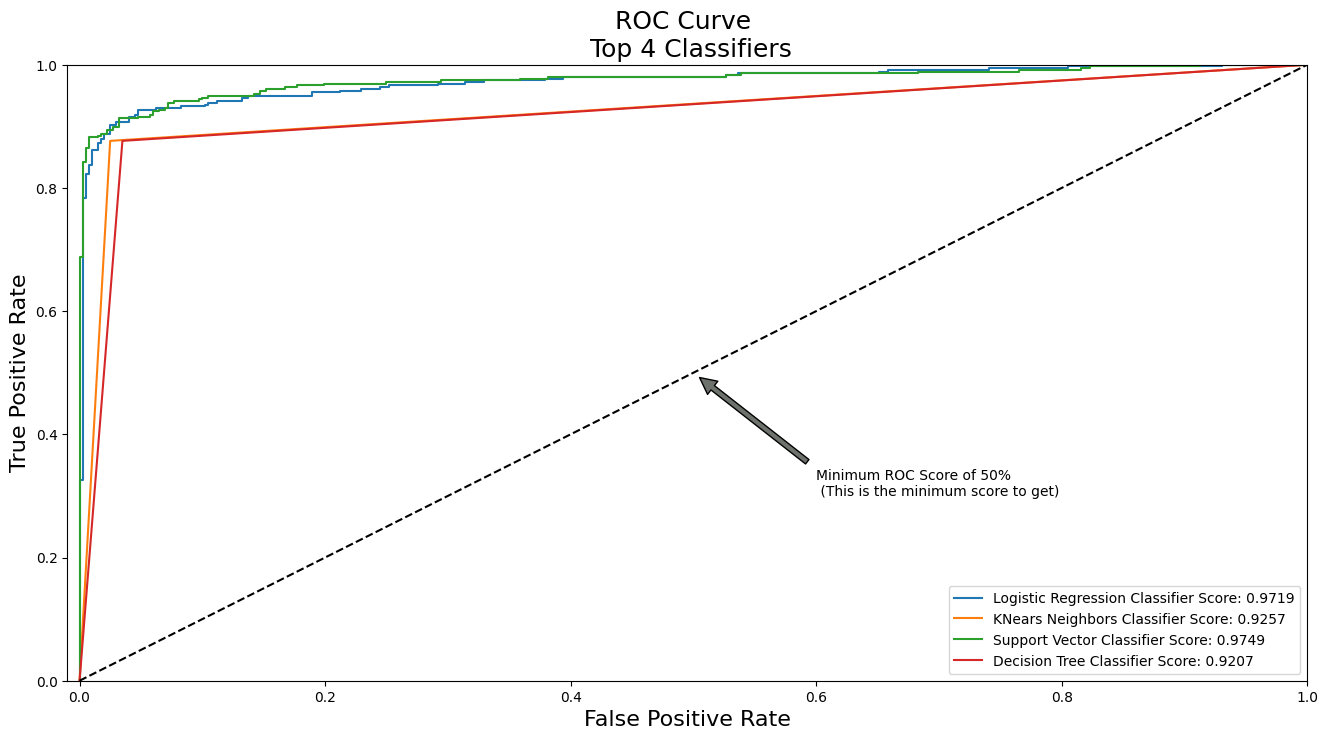

In [40]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label=f'Logistic Regression Classifier Score: {roc_auc_score(y_train, log_reg_pred):.4f}')
    plt.plot(knear_fpr, knear_tpr, label=f'KNears Neighbors Classifier Score: {roc_auc_score(y_train, knears_pred):.4f}')
    plt.plot(svc_fpr, svc_tpr, label=f'Support Vector Classifier Score: {roc_auc_score(y_train, svc_pred):.4f}')
    plt.plot(tree_fpr, tree_tpr, label=f'Decision Tree Classifier Score: {roc_auc_score(y_train, tree_pred):.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

## **Deeper Look at Logistic Regression**

True Positives: Correctly Classified Fraud Transactions  
False Positives: Incorrectly Classified Fraud Transactions  
True Negative: Correctly Classified Non-Fraud Transactions  
False Negative: Incorrectly Classified Non-Fraud Transactions  
Precision: True Positives/(True Positives + False Positives)  
Recall: True Positives/(True Positives + False Negatives)  

Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.  

The precision/recall tradeoff means that if we want our model to be more precise (correct when it predicts fraud), it might detect fewer fraud cases overall. For example:  
	•	At 95% precision, the model confidently detects only 5 fraud cases.  
	•	If we lower the precision to 90%, the model becomes less strict and detects 5 additional fraud cases it was less sure about.  

Higher precision = fewer detections but more accurate. Lower precision = more detections but less accurate.  

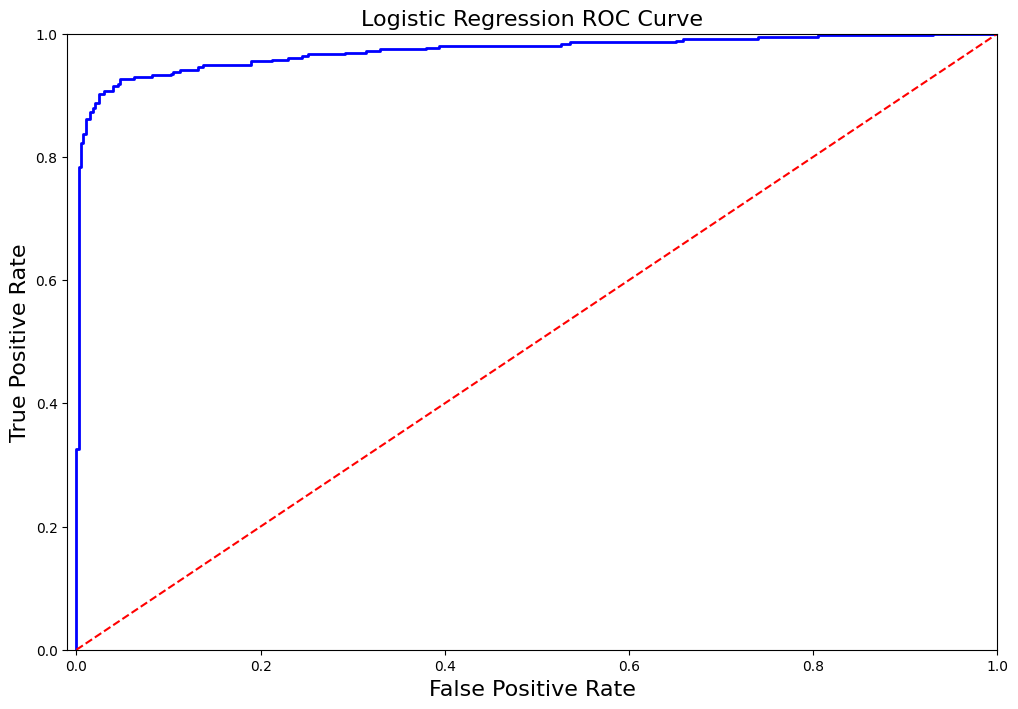

In [41]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [42]:
from sklearn.metrics import precision_recall_curve

# Takes parameters y_true and probabilities (either probability estimates of the positive class or decision function values)
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [43]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print(f'Recall Score: {recall_score(y_train, y_pred):.2f}')
print(f'Precision Score: {precision_score(y_train, y_pred):.2f}')
print(f'F1 Score: {f1_score(y_train, y_pred):.2f}')
print(f'Accuracy Score: {accuracy_score(y_train, y_pred):.2f}')
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print(f"Accuracy Score: {np.mean(undersample_accuracy):.2f}")
print(f"Precision Score: {np.mean(undersample_precision):.2f}")
print(f"Recall Score: {np.mean(undersample_recall):.2f}")
print(f"F1 Score: {np.mean(undersample_f1):.2f}")
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.89
Precision Score: 0.98
F1 Score: 0.93
Accuracy Score: 0.94
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:



NameError: name 'undersample_accuracy' is not defined

In [44]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [45]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print(f'Average precision-recall score: {undersample_average_precision:0.2f}')

Average precision-recall score: 0.70


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.70')

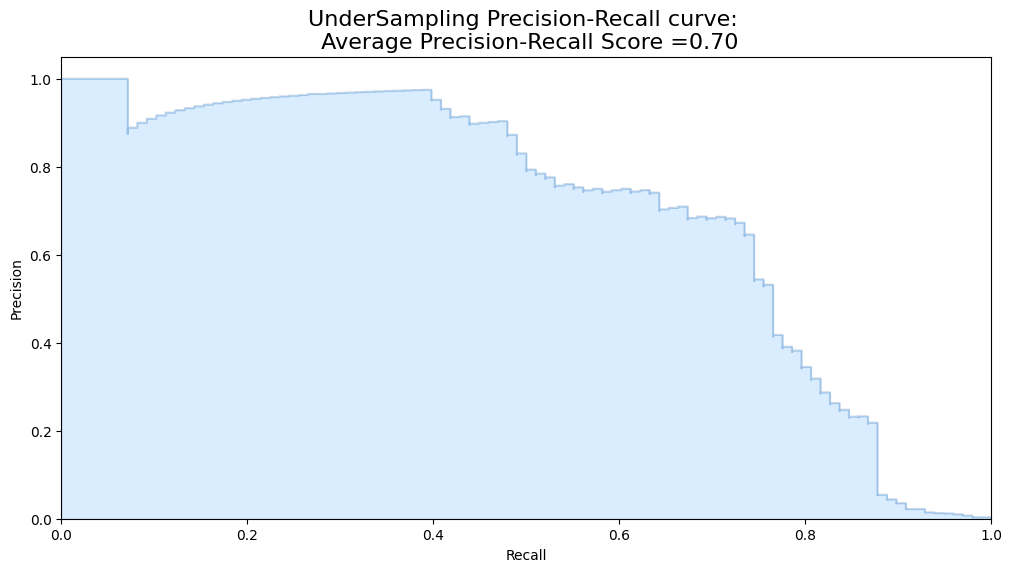

In [46]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={undersample_average_precision:0.2f}', fontsize=16)

Undersampling and oversampling are techniques used to handle imbalanced datasets (e.g., when one class, like “fraud,” has much fewer examples than another).  

- Undersampling: Reduces the size of the majority class (e.g., “non-fraud”) to match the size of the minority class (“fraud”). It helps balance the dataset but risks losing useful data.  
- Oversampling: Increases the size of the minority class by duplicating its data or creating synthetic examples. This balances the dataset without losing data but risks overfitting.  

Both aim to give the model equal focus on both classes.  

## **SMOTE**

SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".  

- More information is retained since we didn't have to delete any rows unlike in random undersampling.  
- Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated. 

When you undersample or oversample before cross-validation, you’re modifying the data in a way that affects both the training and validation sets. This is a problem because:  

- The validation set is supposed to test your model on unseen data.  
- By oversampling or undersampling first, the validation set can end up with information from the training set (like duplicated or synthetic data).  

This is called data leakage because the model “sees” part of the validation data during training, leading to overly optimistic results.  

Instead, you should apply undersampling or oversampling inside each fold of cross-validation to keep training and validation sets completely separate.

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "solver": ['liblinear']}

# Shuffle Split first divides the dataset.
# Then, within each split, SMOTE is applied only to the training set inside the cross-validation folds, preventing leakage.
for train_index, test_index in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])
    
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test_index])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
    precision_lst.append(precision_score(original_ytrain[test_index], prediction))
    recall_lst.append(recall_score(original_ytrain[test_index], prediction))
    f1_lst.append(f1_score(original_ytrain[test_index], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test_index], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9611890231036828
precision: 0.06208144277522103
recall: 0.9137293086660175
f1: 0.11473859924982877
---------------------------------------------------------------------------------------------------------------------------------------


In [48]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [49]:
y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)

print(f'Average precision-recall score: {average_precision:0.2f}')

Average precision-recall score: 0.76


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.76')

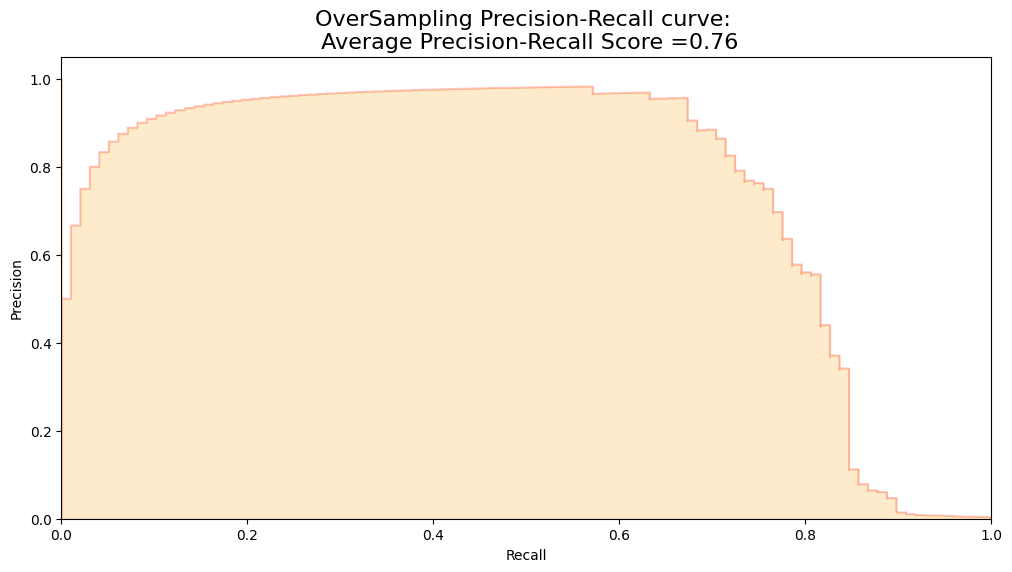

In [50]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={average_precision:0.2f}', fontsize=16)

In [51]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE with the correct parameter
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to oversample the minority class
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [52]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print(f"Fitting oversample data took :{t1 - t0} sec")

Fitting oversample data took :12.322527170181274 sec
